In [1]:
"""plot rewards in the folder paper_data"""
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
# from nn_core.common import PROJECT_ROOT
from pathlib import Path

print(os.path.abspath(os.curdir))
os.chdir("..")
print(os.path.abspath(os.curdir))

/Users/antonioricciardi/projects/rl_relrepr_gymnasium/notebooks
/Users/antonioricciardi/projects/rl_relrepr_gymnasium


In [2]:

# DATA_DIR: Path = PROJECT_ROOT

In [3]:
env_name = "BoxingNoFrameskip-v4_plain" #"PongNoFrameskip-v4_plain"
modes = ["absolute", "relative"]

type = "eval"

In [9]:
""" UTILITY FUNCTIONS """
def truncate_to_min_len_rewards(dframes):
    lengths = [len(df) for df in dframes]
    min_l = min(lengths)
    rewards = np.zeros((len(dframes), min_l))
    frames = np.zeros((len(dframes), min_l))
    for i, df in enumerate(dframes):
        # truncate df to min_l
        df = df.iloc[:min_l]
        # take only df['episode_reward'] values
        rewards[i] = df['episode_reward'].values
        frames[i] = df['frame'].values
    return rewards, frames

def smooth_line_plot(data, smooth=1):
    # taken from: https://github.com/openai/spinningup/blob/master/spinup/utils/plot.py
    y = np.ones(smooth)
    smoothed_data = np.convolve(data,y,'same') / np.convolve(np.ones(len(data)),y,'same')
    return smoothed_data

In [5]:
dframes_abs = []
dframes_rel = []
data_path_abs = os.path.join(f'experiments/{env_name}/{modes[0]}/{type}/csv')
data_path_rel = os.path.join(f'experiments/{env_name}/{modes[1]}/{type}/csv')
# loop over all files in the directory
for file in os.listdir(data_path_abs):
    # load data that starts with "train_abs*.csv"
    if file.startswith(f'seed'):
        dframes_abs.append(pd.read_csv(os.path.join(data_path_abs, file)))
for file in os.listdir(data_path_rel):
    if file.startswith(f'seed'):
        dframes_rel.append(pd.read_csv(os.path.join(data_path_rel, file)))


FileNotFoundError: [Errno 2] No such file or directory: 'experiments/BoxingNoFrameskip-v4_plain/absolute/eval/csv'

In [ ]:
print(len(dframes_abs))
print(len(dframes_rel))

In [ ]:
# show columns
df_abs = dframes_abs[0]
df_abs.columns

In [ ]:
# plot episode_reward against frame

plt.figure(figsize=(10, 5))
plt.plot(df_abs['frame'], df_abs['episode_reward'])
plt.xlabel('frame')
plt.ylabel('episode_reward')
plt.title('episode_reward against frame')
plt.show()

In [ ]:
rewards_abs, frames_abs = truncate_to_min_len_rewards(dframes_abs)
rewards_rel, frames_rel = truncate_to_min_len_rewards(dframes_rel)

# lenghts_abs = [len(df_abs) for df_abs in dframes_abs]
# min_l = min(lenghts_abs)
# rewards = np.zeros((len(dframes_abs), min_l))
# frames = np.zeros((len(dframes_abs), min_l))
# for i, df_abs in enumerate(dframes_abs):
#     # truncate df_abs to min_l
#     df_abs = df_abs.iloc[:min_l]
#     # take only df_abs['episode_reward'] values
#     rewards[i] = df_abs['episode_reward'].values
#     frames[i] = df_abs['frame'].values

# compute mean and std of rewards and frames, keep the min_l values
mean_rewards_abs = np.mean(rewards_abs, axis=0) # from (n, min_l) to (min_l)
std_rewards_abs = np.std(rewards_abs, axis=0)
mean_frames_abs = np.mean(frames_abs, axis=0)

mean_rewards_rel = np.mean(rewards_rel, axis=0) # from (n, min_l) to (min_l)
std_rewards_rel = np.std(rewards_rel, axis=0)
mean_frames_rel = np.mean(frames_rel, axis=0)


# plot, with smoothing
plt.figure(figsize=(10, 5))
plt.plot(mean_frames_abs, mean_rewards_abs, label='mean abs')
plt.fill_between(mean_frames_abs, mean_rewards_abs-std_rewards_abs, mean_rewards_abs+std_rewards_abs, alpha=0.3)
plt.plot(mean_frames_rel, mean_rewards_rel, label='mean rel')
plt.fill_between(mean_frames_rel, mean_rewards_rel-std_rewards_rel, mean_rewards_rel+std_rewards_rel, alpha=0.3)
plt.title('Mean reward over time')
plt.xlabel('Frames')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [ ]:
smooth = 4
# y = np.ones(smooth)
# smoothed_rewards = np.convolve(mean_rewards,y,'same') / np.convolve(np.ones(len(mean_rewards)),y,'same')
# smoothed_std_rewards = np.convolve(std_rewards,y,'same') / np.convolve(np.ones(len(std_rewards)),y,'same')

smoothed_rewards_abs = smooth_line_plot(mean_rewards_abs, smooth)
smoothed_std_rewards_abs = smooth_line_plot(std_rewards_abs, smooth)

smoothed_rewards_rel = smooth_line_plot(mean_rewards_rel, smooth)
smoothed_std_rewards_rel = smooth_line_plot(std_rewards_rel, smooth)




In [ ]:
# plot, with smoothing
sns.set_theme(font_scale=2.0)
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
# set range for x axis to 5e5
# plt.xlim(0, 5e6)
plt.plot(mean_frames_abs, smoothed_rewards_abs, label='E. Abs.')
plt.fill_between(mean_frames_abs, smoothed_rewards_abs-smoothed_std_rewards_abs, smoothed_rewards_abs+smoothed_std_rewards_abs, alpha=0.2)
plt.plot(mean_frames_rel, smoothed_rewards_rel, label='E. Rel. (ours)')
plt.fill_between(mean_frames_rel, smoothed_rewards_rel-smoothed_std_rewards_rel, smoothed_rewards_rel+smoothed_std_rewards_rel, alpha=0.2)
# plt.title(f'Mean reward over time (smoothing={smooth})')
# plt.xlabel('Steps', fontsize=20)  # Increase the font size of the x-axis label
# plt.ylabel('Episodic return', fontsize=14)  # Increase the font size of the y-axis label
lg = plt.legend(loc='lower right', facecolor='white') #prop={'size': 12},
lg.get_frame().set_edgecolor('black')  # Set the legend border color to black
# plt.xticks(fontsize=20)  # Increase the font size of the x-axis ticks
# plt.yticks(fontsize=20)  # Increase the font size of the y-axis ticks
plt.xlabel('Frames')
plt.ylabel('Score')
# tight
plt.tight_layout()
# save fig as pdf
plt.savefig(f'{env_name}_{type}_meanreward_smooth{smooth}.pdf', format='pdf')
plt.show()

# Comparing different EMAs

In [2]:
# print current working directory
print(os.path.abspath(os.curdir))

/Users/antonioricciardi/projects/rl_relrepr_gymnasium


In [7]:
env_id = "CarRacing-v2" #"PongNoFrameskip-v4_plain"
color = "green"
env_name = f"{env_id}/{color}"
emas = [0.0, 0.1, 0.5, 0.9, 0.999]

""" each ema has a different folder. Load the data from each folder and plot the mean reward over time """
dframes = dict()

for ema in emas:
    dframes[ema] = []
    data_path = os.path.join(f'experiments/training/{env_name}/ema_comparison/{ema}')
    # loop over all files in the directory
    for file in os.listdir(data_path):
        # load data that starts with "train_abs*.csv"
        if file.startswith('eval'):
            dframes[ema].append(pd.read_csv(os.path.join(data_path, file)))


# load baseline data for comparison
dframes_baseline = []
data_path_baseline = os.path.join(f'experiments/training/{env_name}/absolute/eval')
# loop over all files in the directory
for file in os.listdir(data_path_baseline):
    # load data that starts with "train_abs*.csv"
    if file.startswith('eval'):
        dframes_baseline.append(pd.read_csv(os.path.join(data_path_baseline, file)))


In [8]:
# get 'episode_reward' and 'frame' columns
rewards = dict()
frames = dict()
for ema in emas:
    rewards[ema], frames[ema] = truncate_to_min_len_rewards(dframes[ema])

rewards_baseline, frames_baseline = truncate_to_min_len_rewards(dframes_baseline)
# truncate rewards_baseline to the minimum length of the other rewards
rewards_baseline = rewards_baseline[:, :rewards[0.0].shape[1]]

In [9]:
# compute mean and std of rewards and frames, keep the min_l values
mean_rewards = dict()
std_rewards = dict()

for ema in emas:
    mean_rewards[ema] = np.mean(rewards[ema], axis=0) # from (n, min_l) to (min_l)
    std_rewards[ema] = np.std(rewards[ema], axis=0)
    mean_frames = np.mean(frames[ema], axis=0)

mean_rewards_baseline = np.mean(rewards_baseline, axis=0) # from (n, min_l) to (min_l)
std_rewards_baseline = np.std(rewards_baseline, axis=0)

# I think i need a mean_rewards_baseline_100, of the last 100 episodes
mean_rewards_baseline_100 = np.mean(rewards_baseline[-100:], axis=0) # from (n, min_l) to (min_l)
std_rewards_baseline_100 = np.std(rewards_baseline[-100:], axis=0)

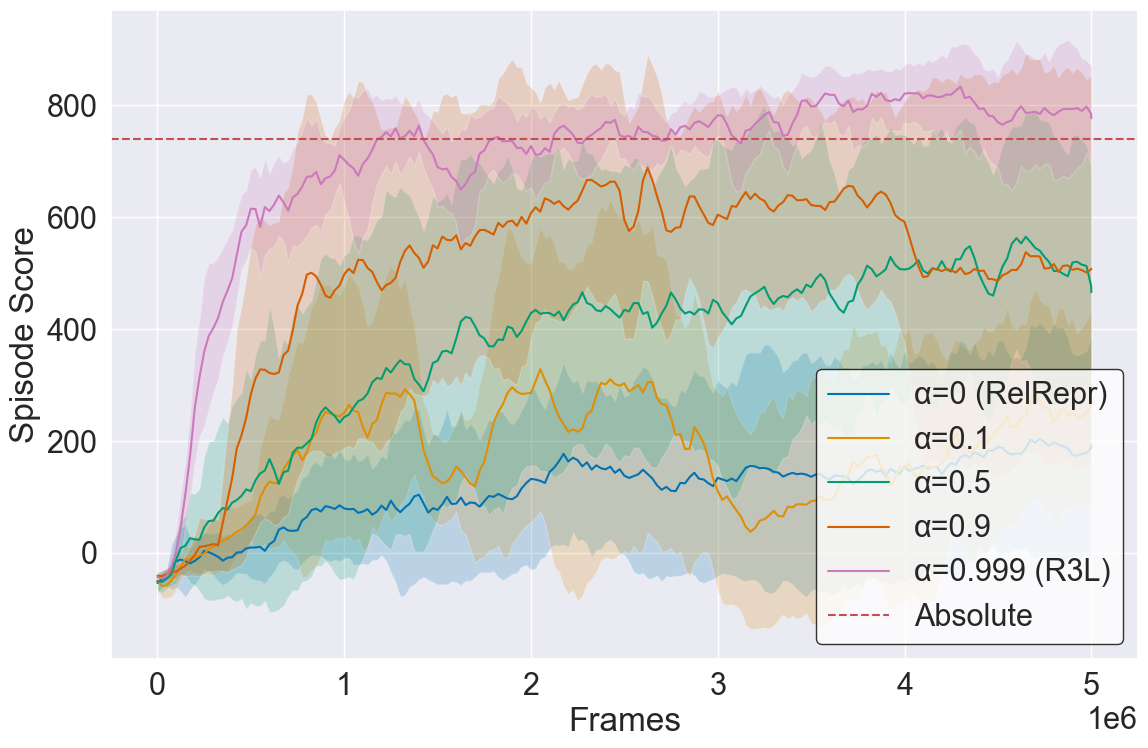

In [10]:
# plot, with smoothing
smooth = 4
smoothed_rewards = dict()
smoothed_std_rewards = dict()
for ema in emas:
    smoothed_rewards[ema] = smooth_line_plot(mean_rewards[ema], smooth)
    smoothed_std_rewards[ema] = smooth_line_plot(std_rewards[ema], smooth)

# plot, with smoothing
sns.set_theme(font_scale=2.0)
sns.set_style("darkgrid")
sns.set_palette("colorblind")  # Use colorblind-friendly palette
plt.figure(figsize=(12, 8))  # Increase the height of the plot
# set range for x axis to 5e5
# plt.xlim(0, 5e6)

for ema in emas:
    if ema == 0:
        label = 'α=0 (RelRepr)'
    elif ema == 0.999:
        label = 'α=0.999 (R3L)'
    else:
        label = f'α={ema}'
    plt.plot(mean_frames, smoothed_rewards[ema], label=label)
    plt.fill_between(mean_frames, smoothed_rewards[ema]-smoothed_std_rewards[ema], smoothed_rewards[ema]+smoothed_std_rewards[ema], alpha=0.2)

# Add baseline as a horizontal line
baseline_mean_reward = np.mean(mean_rewards_baseline_100)
plt.axhline(y=baseline_mean_reward, color='r', linestyle='--', label='Absolute')

lg = plt.legend(loc='lower right', facecolor='white') #prop={'size': 12},
lg.get_frame().set_edgecolor('black')  # Set the legend border color to black

plt.xlabel('Frames')
plt.ylabel('Spisode Score')
# tight
plt.tight_layout()
# save fig as pdf

# check whether experiments/plots folder exists
Path("experiments/plots").mkdir(parents=True, exist_ok=True)
# replace slashes in env_name with underscores
save_env_name = env_name.replace('/', '_')
plt.savefig(f'experiments/plots/{save_env_name}_ema-comparison_smooth{smooth}_baseline.pdf', format='pdf')
plt.show()


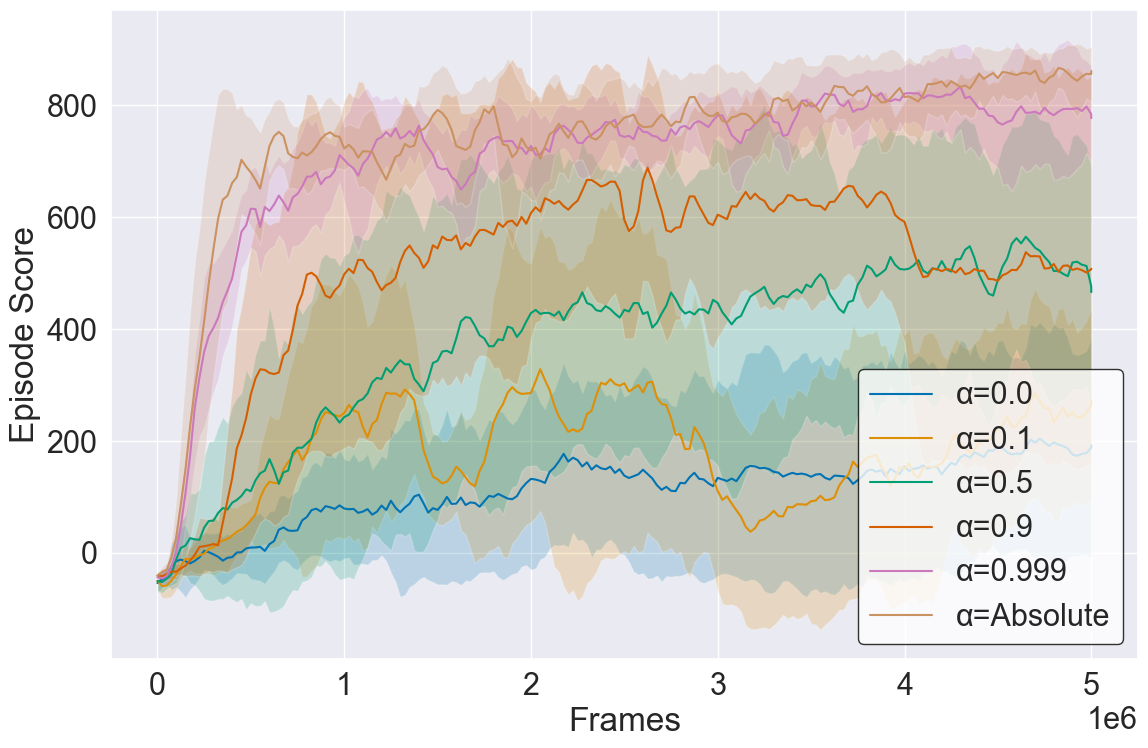

In [11]:
# plot, with smoothing
smooth = 4
smoothed_rewards = dict()
smoothed_std_rewards = dict()
for ema in emas:
    smoothed_rewards[ema] = smooth_line_plot(mean_rewards[ema], smooth)
    smoothed_std_rewards[ema] = smooth_line_plot(std_rewards[ema], smooth)

smoothed_rewards["Absolute"] = smooth_line_plot(mean_rewards_baseline, smooth)
smoothed_std_rewards["Absolute"] = smooth_line_plot(std_rewards_baseline, smooth)
emas.append(1000)

# plot, with smoothing
sns.set_theme(font_scale=2.0)
sns.set_style("darkgrid")
sns.set_palette("colorblind")  # Use colorblind-friendly palette
plt.figure(figsize=(12, 8))  # Increase the height of the plot
# set range for x axis to 5e5
# plt.xlim(0, 5e6)
for ema in emas:
    if ema == 1000:
        ema = 'Absolute'
    plt.plot(mean_frames, smoothed_rewards[ema], label=f'α={ema}')
    plt.fill_between(mean_frames, smoothed_rewards[ema]-smoothed_std_rewards[ema], smoothed_rewards[ema]+smoothed_std_rewards[ema], alpha=0.2)

# # Add baseline as a horizontal line
# baseline_mean_reward = np.mean(mean_rewards_baseline_100)
# plt.axhline(y=baseline_mean_reward, color='r', linestyle='--', label='Absolute')

lg = plt.legend(loc='lower right', facecolor='white') #prop={'size': 12},
lg.get_frame().set_edgecolor('black')  # Set the legend border color to black

plt.xlabel('Frames')
plt.ylabel('Episode Score')
# tight
plt.tight_layout()
# save fig as pdf

# check whether experiments/plots folder exists
Path("experiments/plots").mkdir(parents=True, exist_ok=True)
# replace slashes in env_name with underscores
safe_env_name = env_name.replace('/', '_')
plt.savefig(f'experiments/plots/{safe_env_name}_ema-comparison_smooth{smooth}.pdf', format='pdf')
plt.show()


In [12]:
""" plot alpha vs mean reward """
# compute mean reward for each alpha
mean_rewards_100 = dict()
std_rewards_100 = dict()
for ema in emas:
    mean_rewards_100[ema] = np.mean(rewards[ema][:, -100:], axis=1)
    std_rewards_100[ema] = np.std(rewards[ema][:, -100:], axis=1)

# plot
plt.figure(figsize=(10, 5))
plt.errorbar(emas, [np.mean(mean_rewards_100[ema]) for ema in emas], 
             yerr=[np.std(mean_rewards_100[ema]) for ema in emas], 
             fmt='o', capsize=5)
plt.xlabel('α')
plt.ylabel('Mean reward')
plt.title('α vs Mean reward')
plt.show()

KeyError: 1000

KeyError: 1000

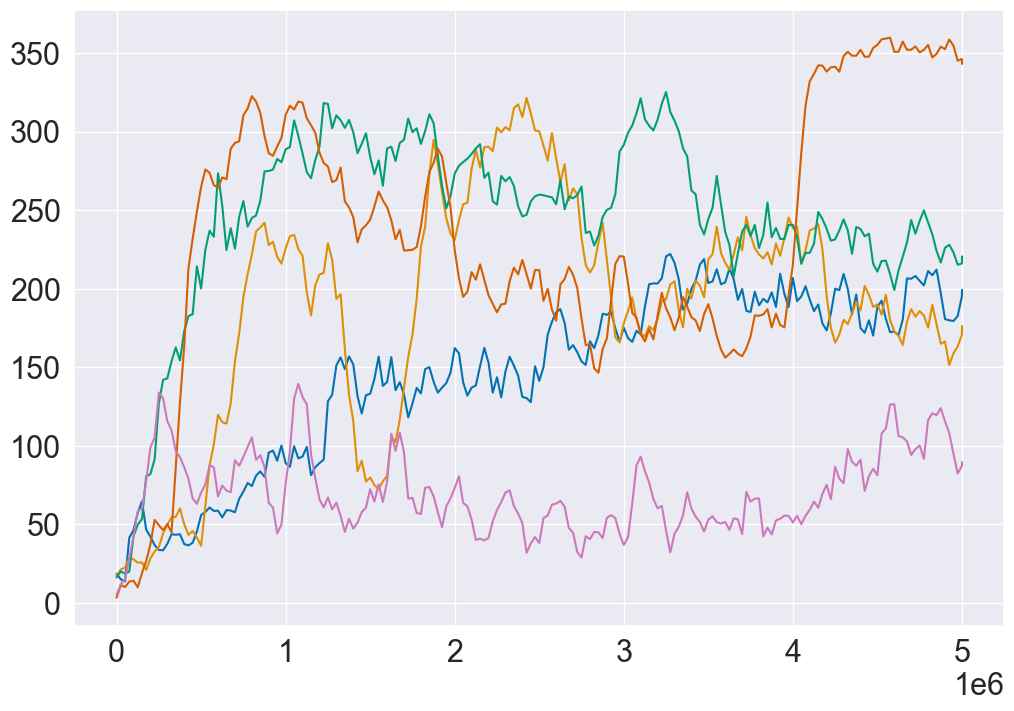

In [13]:
# plot, with smoothing
sns.set_theme(font_scale=2.0)
sns.set_style("darkgrid")
sns.set_palette("colorblind")  # Use colorblind-friendly palette
plt.figure(figsize=(12, 8))  # Increase the height of the plot
# set range for x axis to 5e5
# plt.xlim(0, 5e6)
for ema in emas:
    plt.plot(mean_frames, smoothed_std_rewards[ema], label=f'α={ema}')

# Add baseline as a horizontal line
baseline_std_reward = np.mean(std_rewards_baseline_100)
plt.axhline(y=baseline_std_reward, color='r', linestyle='--', label='Absolute')

lg = plt.legend(loc='upper right', facecolor='white') #prop={'size': 12},
lg.get_frame().set_edgecolor('black')  # Set the legend border color to black

plt.xlabel('Frames')
plt.ylabel('Standard Deviation of Score')
# tight
plt.tight_layout()
# save fig as pdf

# check whether experiments/plots folder exists
Path("experiments/plots").mkdir(parents=True, exist_ok=True)
# replace slashes in env_name with underscores
safe_env_name = env_name.replace('/', '_')
plt.savefig(f'experiments/plots/{safe_env_name}_ema-comparison_std_smooth{smooth}.pdf', format='pdf')
plt.show()

# Randomized anchors

### Compare abs, rel and rel with randomized anchors collection

In [39]:
path_name = 'experiments/training/LunarLanderRGB-10/eval'

abs_path = os.path.join(path_name, 'absolute')
rel_path = os.path.join(path_name, 'relative')
rel_rand_path = os.path.join(path_name, 'relative_randomized_anchors')

env_name = 'LunarLanderRGB-10'


In [40]:
print(abs_path)

experiments/training/LunarLanderRGB-10/eval/absolute


In [41]:
# collect csvs as dataframes for each folder
abs_dfs = []
rel_dfs = []
rel_rand_dfs = []

for file in os.listdir(abs_path):
    if file.startswith('eval'):
        abs_dfs.append(pd.read_csv(os.path.join(abs_path, file)))

for file in os.listdir(rel_path):
    if file.startswith('eval'):
        rel_dfs.append(pd.read_csv(os.path.join(rel_path, file)))

for file in os.listdir(rel_rand_path):
    if file.startswith('eval'):
        rel_rand_dfs.append(pd.read_csv(os.path.join(rel_rand_path, file)))

# truncate to min length
abs_rewards, abs_frames = truncate_to_min_len_rewards(abs_dfs)
rel_rewards, rel_frames = truncate_to_min_len_rewards(rel_dfs)
rel_rand_rewards, rel_rand_frames = truncate_to_min_len_rewards(rel_rand_dfs)


In [42]:
len(abs_rewards), len(rel_rewards), len(rel_rand_rewards)

(4, 3, 3)

In [43]:
# compute mean and std of rewards and frames, keep the min_l values
mean_abs_rewards = np.mean(abs_rewards, axis=0) # from (n, min_l) to (min_l)
std_abs_rewards = np.std(abs_rewards, axis=0)

mean_rel_rewards = np.mean(rel_rewards, axis=0) # from (n, min_l) to (min_l)
std_rel_rewards = np.std(rel_rewards, axis=0)

mean_rel_rand_rewards = np.mean(rel_rand_rewards, axis=0) # from (n, min_l) to (min_l)
std_rel_rand_rewards = np.std(rel_rand_rewards, axis=0)

mean_abs_frames = np.mean(abs_frames, axis=0)
mean_rel_frames = np.mean(rel_frames, axis=0)
mean_rel_rand_frames = np.mean(rel_rand_frames, axis=0)


In [44]:
# plot, with smoothing
smooth = 4
smoothed_abs_rewards = smooth_line_plot(mean_abs_rewards, smooth)
smoothed_std_abs_rewards = smooth_line_plot(std_abs_rewards, smooth)

smoothed_rel_rewards = smooth_line_plot(mean_rel_rewards, smooth)
smoothed_std_rel_rewards = smooth_line_plot(std_rel_rewards, smooth)

smoothed_rel_rand_rewards = smooth_line_plot(mean_rel_rand_rewards, smooth)
smoothed_std_rel_rand_rewards = smooth_line_plot(std_rel_rand_rewards, smooth)

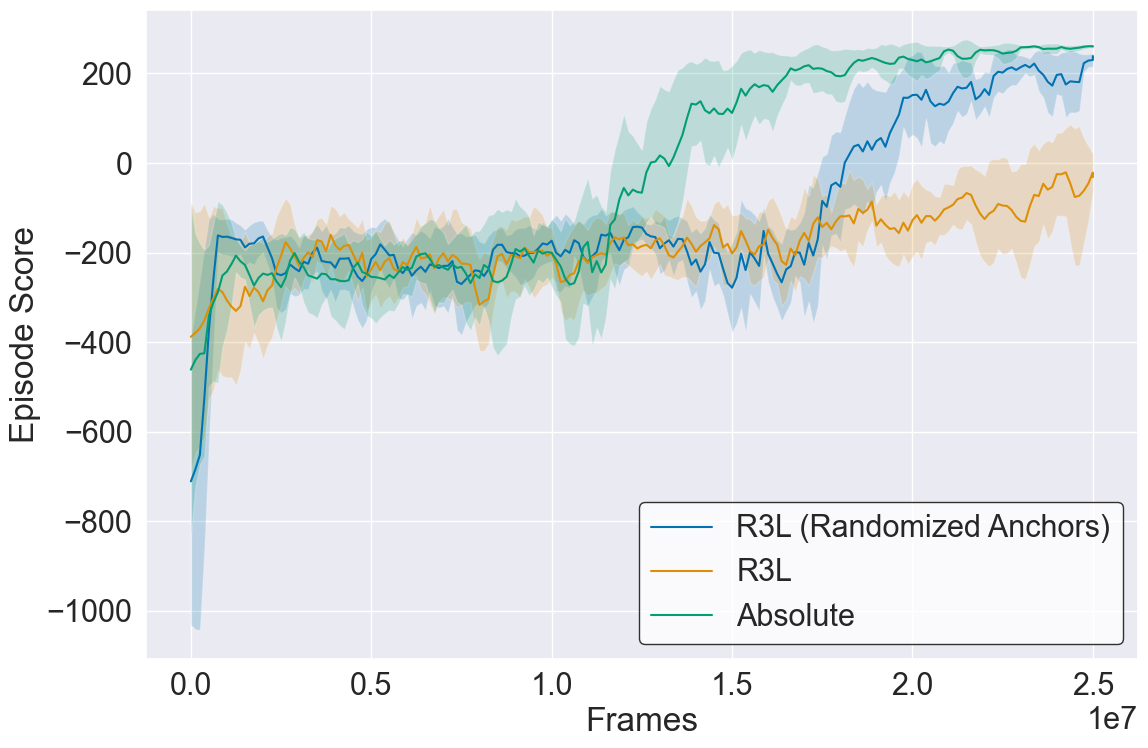

In [50]:
# plot, with smoothing
sns.set_theme(font_scale=2.0)
sns.set_style("darkgrid")
sns.set_palette("colorblind")  # Use colorblind-friendly palette
plt.figure(figsize=(12, 8))  # Increase the height of the plot

plt.plot(mean_rel_rand_frames, smoothed_rel_rand_rewards, label='R3L (Randomized Anchors)')
plt.fill_between(mean_rel_rand_frames, smoothed_rel_rand_rewards-smoothed_std_rel_rand_rewards, smoothed_rel_rand_rewards+smoothed_std_rel_rand_rewards, alpha=0.2)

plt.plot(mean_rel_frames, smoothed_rel_rewards, label='R3L')
plt.fill_between(mean_rel_frames, smoothed_rel_rewards-smoothed_std_rel_rewards, smoothed_rel_rewards+smoothed_std_rel_rewards, alpha=0.2)

plt.plot(mean_abs_frames, smoothed_abs_rewards, label='Absolute')
plt.fill_between(mean_abs_frames, smoothed_abs_rewards-smoothed_std_abs_rewards, smoothed_abs_rewards+smoothed_std_abs_rewards, alpha=0.2)

lg = plt.legend(loc='lower right', facecolor='white')
lg.get_frame().set_edgecolor('black')

plt.xlabel('Frames')
plt.ylabel('Episode Score')
plt.tight_layout()

# check whether experiments/plots folder exists
Path("experiments/plots").mkdir(parents=True, exist_ok=True)
# replace slashes in env_name with underscores
safe_env_name = env_name.replace('/', '_')
plt.savefig(f'experiments/plots/{safe_env_name}_r3l_anchors_smooth{smooth}.pdf', format='pdf')
plt.show()